In [2]:
from keras.datasets import mnist
import numpy as np

"""
Hernández Navarro Armando
Tomamos como base 2024_02_09_RPAA_Práctica_2 y la modificamos
"""



(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Se obtiene una muestra con igual número de: cincos vs no cincos
# para el conjunto de entrenamiento y el de test
idx_y_train_5 = np.where(y_train == 5)[0]  # Indica los indices donde se encuentra un 5
idx_y_train_n5 = np.where(y_train != 5)[0] # Indica los indices de los valores donde no se encuentra un 5
# Crea un arreglo del mismo tamaño de el conjunto de indices de 5, pero unicamente de los indices de no 5's
# Usado para igualar el número de 5's y no 5's en un unico array que contiene los indices
idx_y_train_n5 = np.random.choice(idx_y_train_n5, idx_y_train_5.shape[0], replace=False)



# Concatenamos ambos arrays y revolvemos para obtener un unico array de indices de 5's y no 5's revuelto
idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5])
np.random.shuffle(idx_y_train)

# Creamos los arrays pero ahora con los valores y no los indices (usando los indices previos)
x_train = x_train[idx_y_train]
y_train = y_train[idx_y_train]
print(x_train.shape)


# Realizamos los mismos pasos para el conjunto de prueba
idx_y_test_5 = np.where(y_test == 5)[0]
idx_y_test_n5 = np.where(y_test != 5)[0]
idx_y_test_n5 = np.random.choice(idx_y_test_n5, idx_y_test_5.shape[0], replace=False)

idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
np.random.shuffle(idx_y_test)

x_test = x_test[idx_y_test]
y_test = y_test[idx_y_test]
print(x_test.shape)

y_train_binary = (y_train == 5).astype(int)
y_test_binary = (y_test == 5).astype(int)

(10842, 28, 28)
(1784, 28, 28)


In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.metrics import F1Score
from sklearn.metrics import confusion_matrix, \
precision_score, recall_score,f1_score, accuracy_score #Añadimos accuracy

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1)
])

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [15]:
# Primer Entrenamiento
print('Primer entrenamiento')
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_binary, epochs=4, batch_size=2000, validation_split=0.9)



y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]

print()
conf_matrix = confusion_matrix(y_test_binary, y_pred)
print("Matriz de confusión:")
print(conf_matrix)
print("Accuracy: ", accuracy_score(y_test_binary, y_pred)) #Agregamos accuracy
print()

precision = precision_score(y_test_binary, y_pred)
print("Precision_1:", precision)
recall = recall_score(y_test_binary, y_pred)
print("Recall_1:", recall)
f1_s = f1_score(y_test_binary, y_pred)
print("F1-score_1:", f1_s)


precision_0 = precision_score(y_test_binary, y_pred, pos_label=0)
print("Precision_0:", precision_0)
recall_0 = recall_score(y_test_binary, y_pred, pos_label=0)
print("Recall_0:", recall_0)
f1_s_0 = f1_score(y_test_binary, y_pred, pos_label=0)
print("F1-score_0:", f1_s_0)

Primer entrenamiento
Epoch 1/4
1/1 [==============================] - 1s 705ms/step - loss: 8.9458 - accuracy: 0.4179 - val_loss: 8.5763 - val_accuracy: 0.4394
Epoch 2/4
1/1 [==============================] - 0s 105ms/step - loss: 8.6398 - accuracy: 0.4336 - val_loss: 8.3435 - val_accuracy: 0.4570
Epoch 3/4
1/1 [==============================] - 0s 67ms/step - loss: 8.6078 - accuracy: 0.4410 - val_loss: 8.3546 - val_accuracy: 0.4560
Epoch 4/4
56/56 [==============================] - 0s 2ms/step

Matriz de confusión:
[[692 200]
 [802  90]]
Accuracy:  0.4383408071748879

Precision_1: 0.3103448275862069
Recall_1: 0.10089686098654709
F1-score_1: 0.15228426395939088
Precision_0: 0.46318607764390896
Recall_0: 0.7757847533632287
F1-score_0: 0.5800502933780385


In [16]:
# Segundo entrenamiento
print('Segundo entrenamiento')
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_binary, epochs=20, batch_size=2000, validation_split=0.9)



y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]

print()
conf_matrix = confusion_matrix(y_test_binary, y_pred)
print("Matriz de confusión:")
print(conf_matrix)
print("Accuracy: ", accuracy_score(y_test_binary, y_pred))
print()

precision = precision_score(y_test_binary, y_pred)
print("Precision_1:", precision)
recall = recall_score(y_test_binary, y_pred)
print("Recall_1:", recall)
f1_s = f1_score(y_test_binary, y_pred)
print("F1-score_1:", f1_s)


precision_0 = precision_score(y_test_binary, y_pred, pos_label=0)
print("Precision_0:", precision_0)
recall_0 = recall_score(y_test_binary, y_pred, pos_label=0)
print("Recall_0:", recall_0)
f1_s_0 = f1_score(y_test_binary, y_pred, pos_label=0)
print("F1-score_0:", f1_s_0)

Segundo entrenamiento
Epoch 1/20
1/1 [==============================] - 1s 915ms/step - loss: 8.6237 - accuracy: 0.4391 - val_loss: 8.2738 - val_accuracy: 0.4595
Epoch 2/20
1/1 [==============================] - 0s 151ms/step - loss: 8.6281 - accuracy: 0.4354 - val_loss: 8.0257 - val_accuracy: 0.4754
Epoch 3/20
1/1 [==============================] - 0s 257ms/step - loss: 8.2852 - accuracy: 0.4594 - val_loss: 7.7408 - val_accuracy: 0.4939
Epoch 4/20
1/1 [==============================] - 0s 225ms/step - loss: 7.9384 - accuracy: 0.4815 - val_loss: 7.4878 - val_accuracy: 0.5105
Epoch 5/20
1/1 [==============================] - 0s 186ms/step - loss: 7.7172 - accuracy: 0.4963 - val_loss: 7.3967 - val_accuracy: 0.5161
Epoch 6/20
1/1 [==============================] - 0s 244ms/step - loss: 7.5310 - accuracy: 0.5065 - val_loss: 7.0393 - val_accuracy: 0.5390
Epoch 7/20
1/1 [==============================] - 0s 360ms/step - loss: 7.3595 - accuracy: 0.5175 - val_loss: 6.6813 - val_accuracy: 0.561

In [17]:
# Tercer entrenamiento
print('Tercer entrenamiento')
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_binary, epochs=4, batch_size=2, validation_split=0.9)



y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]

print()
conf_matrix = confusion_matrix(y_test_binary, y_pred)
print("Matriz de confusión:")
print(conf_matrix)
print("Accuracy: ", accuracy_score(y_test_binary, y_pred))
print()

precision = precision_score(y_test_binary, y_pred)
print("Precision_1:", precision)
recall = recall_score(y_test_binary, y_pred)
print("Recall_1:", recall)
f1_s = f1_score(y_test_binary, y_pred)
print("F1-score_1:", f1_s)


precision_0 = precision_score(y_test_binary, y_pred, pos_label=0)
print("Precision_0:", precision_0)
recall_0 = recall_score(y_test_binary, y_pred, pos_label=0)
print("Recall_0:", recall_0)
f1_s_0 = f1_score(y_test_binary, y_pred, pos_label=0)
print("F1-score_0:", f1_s_0)

Tercer entrenamiento
Epoch 1/4
542/542 [==============================] - 9s 15ms/step - loss: 6.7611 - accuracy: 0.5563 - val_loss: 6.9429 - val_accuracy: 0.5439
Epoch 2/4
542/542 [==============================] - 11s 21ms/step - loss: 6.2665 - accuracy: 0.5904 - val_loss: 5.9279 - val_accuracy: 0.6116
Epoch 3/4
542/542 [==============================] - 8s 14ms/step - loss: 5.8942 - accuracy: 0.6116 - val_loss: 5.4787 - val_accuracy: 0.6411
Epoch 4/4
56/56 [==============================] - 0s 2ms/step

Matriz de confusión:
[[781 111]
 [633 259]]
Accuracy:  0.5829596412556054

Precision_1: 0.7
Recall_1: 0.29035874439461884
F1-score_1: 0.410459587955626
Precision_0: 0.5523338048090524
Recall_0: 0.875560538116592
F1-score_0: 0.6773633998265395


In [18]:
# Cuarto entrenamiento
print('Cuarto entrenamiento')
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_binary, epochs=4, batch_size=2000, validation_split=0.01)



y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]

conf_matrix = confusion_matrix(y_test_binary, y_pred)
print()
print("Matriz de confusión:")
print(conf_matrix)
print("Accuracy: ", accuracy_score(y_test_binary, y_pred))
print()

precision = precision_score(y_test_binary, y_pred)
print("Precision_1:", precision)
recall = recall_score(y_test_binary, y_pred)
print("Recall_1:", recall)
f1_s = f1_score(y_test_binary, y_pred)
print("F1-score_1:", f1_s)


precision_0 = precision_score(y_test_binary, y_pred, pos_label=0)
print("Precision_0:", precision_0)
recall_0 = recall_score(y_test_binary, y_pred, pos_label=0)
print("Recall_0:", recall_0)
f1_s_0 = f1_score(y_test_binary, y_pred, pos_label=0)
print("F1-score_0:", f1_s_0)

Cuarto entrenamiento
Epoch 1/4
6/6 [==============================] - 1s 46ms/step - loss: 5.4846 - accuracy: 0.6426 - val_loss: 5.5100 - val_accuracy: 0.6422
Epoch 2/4
6/6 [==============================] - 0s 15ms/step - loss: 4.3903 - accuracy: 0.7135 - val_loss: 5.2279 - val_accuracy: 0.6606
Epoch 3/4
6/6 [==============================] - 0s 11ms/step - loss: 4.2144 - accuracy: 0.7249 - val_loss: 5.3694 - val_accuracy: 0.6514
Epoch 4/4
56/56 [==============================] - 0s 1ms/step

Matriz de confusión:
[[762 130]
 [289 603]]
Accuracy:  0.7651345291479821

Precision_1: 0.8226466575716235
Recall_1: 0.6760089686098655
F1-score_1: 0.7421538461538462
Precision_0: 0.725023786869648
Recall_0: 0.8542600896860987
F1-score_0: 0.784354091610911


In [27]:
# Quinto entrenamiento

print('Quinto modelo')
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1)
])

print(model.summary())

model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_binary, epochs=25, batch_size=400, validation_split=0.1)



y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]

conf_matrix = confusion_matrix(y_test_binary, y_pred)
print()
print("Matriz de confusión:")
print(conf_matrix)
print("Accuracy: ", accuracy_score(y_test_binary, y_pred))
print()

precision = precision_score(y_test_binary, y_pred)
print("Precision_1:", precision)
recall = recall_score(y_test_binary, y_pred)
print("Recall_1:", recall)
f1_s = f1_score(y_test_binary, y_pred)
print("F1-score_1:", f1_s)


precision_0 = precision_score(y_test_binary, y_pred, pos_label=0)
print("Precision_0:", precision_0)
recall_0 = recall_score(y_test_binary, y_pred, pos_label=0)
print("Recall_0:", recall_0)
f1_s_0 = f1_score(y_test_binary, y_pred, pos_label=0)
print("F1-score_0:", f1_s_0)

Quinto modelo
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/25
25/25 [==============================] - 1s 10ms/step - loss: 6.7981 - accuracy: 0.5546 - val_loss: 6.2818 - val_accuracy: 0.5880
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 5.4031 - accuracy: 0.6448 - val_loss: 5.1376 - val_accuracy: 0.6645
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 4.7029 - accuracy: 0.6919 - val_loss: 4.0702 - 

# Resultados del 5to entrenamiento

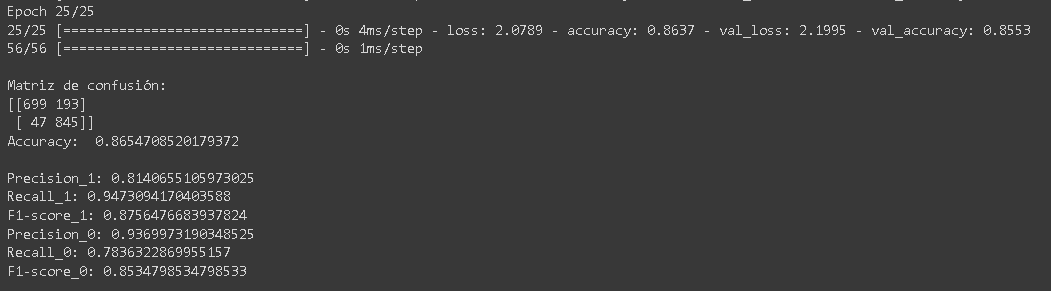